#**IMPORTING THE LIBRIRIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

#**1. ETL**

##**1.1. Extract**

### 1.1.1. Reading the Data

In [ ]:
url = '/content/drive/MyDrive/Challenge telecom x/TelecomX_Data_clean.csv'
datos = pd.read_csv(url)

In [ ]:
datos.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


## 1.2. Transform

In [ ]:
datos.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
datos.describe(include='O')

,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [ ]:
for col in datos:
  print(col, datos[col].unique())

customerID ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn ['No' 'Yes']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['Yes' 'No']
tenure [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
PhoneService ['Yes' 'No']
MultipleLines ['No' 'Yes' 'No phone service']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['Yes' 'No' 'No internet service']
StreamingTV ['Yes' 'No' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['One year' 'Month-to-month' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Mailed check' 'Electronic check' 'Credit card (automatic)'

### 1.2.1. Transformando columnas categoricas

In [ ]:
columnas = datos.columns
columnas

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [ ]:
categoricas = ['Churn','gender','Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies','Contract','PaymentMethod']

In [ ]:
one_hot = make_column_transformer(
    (OneHotEncoder(drop='first'), categoricas),
    remainder='passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False
)

In [ ]:
datos_encode = one_hot.fit_transform(datos)

In [ ]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__Churn_Yes', 'onehotencoder__gender_Male',
       'onehotencoder__Partner_Yes', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PhoneService_Yes',
       'onehotencoder__PaperlessBilling_Yes',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingTV_Yes',
       'onehotencoder__StreamingMovies_No internet service',
       'oneh

In [ ]:
datos_encode_df = pd.DataFrame(datos_encode, columns=one_hot.get_feature_names_out(columnas))

In [ ]:
datos_encode_df.head()

,onehotencoder__Churn_Yes,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__PaperlessBilling_Yes,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__customerID,remainder__SeniorCitizen,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0002-ORFBO,0,9,65.6,593.3
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0003-MKNFE,0,9,59.9,542.4
2,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0004-TLHLJ,0,4,73.9,280.85
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0011-IGKFF,1,13,98.0,1237.85
4,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0013-EXCHZ,1,3,83.9,267.4


In [ ]:
datos_encode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   onehotencoder__Churn_Yes                              7043 non-null   object
 1   onehotencoder__gender_Male                            7043 non-null   object
 2   onehotencoder__Partner_Yes                            7043 non-null   object
 3   onehotencoder__Dependents_Yes                         7043 non-null   object
 4   onehotencoder__PhoneService_Yes                       7043 non-null   object
 5   onehotencoder__PaperlessBilling_Yes                   7043 non-null   object
 6   onehotencoder__MultipleLines_No phone service         7043 non-null   object
 7   onehotencoder__MultipleLines_Yes                      7043 non-null   object
 8   onehotencoder__InternetService_Fiber optic            7043 non-null 

### 1.2.2. Eliminando columnas irrelevantes

**Eliminando customerID, ya que no es una variable que nos aporte informacion relevante**

In [ ]:
datos_encode_df = datos_encode_df.drop(columns = 'remainder__customerID')
datos_encode_df.head()

,onehotencoder__Churn_Yes,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__PaperlessBilling_Yes,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0,9,65.6,593.3
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0,9,59.9,542.4
2,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,4,73.9,280.85
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1,13,98.0,1237.85
4,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,3,83.9,267.4


**necesitamos convertir nuestros datos que ahora estan en tipo object a tipo numerio int o float**

In [ ]:
datos_encode_df = datos_encode_df.apply(pd.to_numeric, errors='ignore')

/tmp/ipython-input-45323555.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datos_encode_df = datos_encode_df.apply(pd.to_numeric, errors='ignore')


In [ ]:
datos_encode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   onehotencoder__Churn_Yes                              7043 non-null   float64
 1   onehotencoder__gender_Male                            7043 non-null   float64
 2   onehotencoder__Partner_Yes                            7043 non-null   float64
 3   onehotencoder__Dependents_Yes                         7043 non-null   float64
 4   onehotencoder__PhoneService_Yes                       7043 non-null   float64
 5   onehotencoder__PaperlessBilling_Yes                   7043 non-null   float64
 6   onehotencoder__MultipleLines_No phone service         7043 non-null   float64
 7   onehotencoder__MultipleLines_Yes                      7043 non-null   float64
 8   onehotencoder__InternetService_Fiber optic            7043

**Revisando la correlacion con nuestra variable objetivo Churn**

In [ ]:
datos_encode_df.corr()['onehotencoder__Churn_Yes'].sort_values()

,onehotencoder__Churn_Yes
remainder__tenure,-0.352229
onehotencoder__Contract_Two year,-0.302253
onehotencoder__OnlineBackup_No internet service,-0.227890
onehotencoder__DeviceProtection_No internet service,-0.227890
onehotencoder__TechSupport_No internet service,-0.227890
onehotencoder__StreamingMovies_No internet service,-0.227890
onehotencoder__OnlineSecurity_No internet service,-0.227890
onehotencoder__InternetService_No,-0.227890
onehotencoder__StreamingTV_No internet service,-0.227890
remainder__Charges.Total,-0.198324


**De acuerdo con la tabla anterior de correlaciones, podemos concluir que hay algunas columnas que no aportan peso a nuestro analisis, por lo general las correlaciones muy cerca a 0 y las mayores de 0.95 son columnas que podemos eliminar**

columnas relacion muy baja relacion:


1. onehotencoder__MultipleLines_No phone service =	-0.011942

2. onehotencoder__gender_Male = -0.008612

3. onehotencoder__PhoneService_Yes	= 0.011942

In [ ]:
columnas_irrelevantes = ['onehotencoder__MultipleLines_No phone service','onehotencoder__gender_Male','onehotencoder__PhoneService_Yes']
datos_encode_df = datos_encode_df.drop(columns=columnas_irrelevantes)
datos_encode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   onehotencoder__Churn_Yes                              7043 non-null   float64
 1   onehotencoder__Partner_Yes                            7043 non-null   float64
 2   onehotencoder__Dependents_Yes                         7043 non-null   float64
 3   onehotencoder__PaperlessBilling_Yes                   7043 non-null   float64
 4   onehotencoder__MultipleLines_Yes                      7043 non-null   float64
 5   onehotencoder__InternetService_Fiber optic            7043 non-null   float64
 6   onehotencoder__InternetService_No                     7043 non-null   float64
 7   onehotencoder__OnlineSecurity_No internet service     7043 non-null   float64
 8   onehotencoder__OnlineSecurity_Yes                     7043

**Calculando VIF, para eliminar las columnas que me generan multicolinealidad

In [ ]:

X = datos_encode_df.drop(columns='onehotencoder__Churn_Yes')
y = datos_encode_df['onehotencoder__Churn_Yes']

In [ ]:
X.columns

Index(['onehotencoder__Partner_Yes', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PaperlessBilling_Yes',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingTV_Yes',
       'onehotencoder__StreamingMovies_No internet service',
       'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Credit card (a

In [ ]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
print(vif_data.sort_values(by="VIF", ascending=False))

                                             Variable        VIF
10  onehotencoder__DeviceProtection_No internet se...        inf
5                   onehotencoder__InternetService_No        inf
6   onehotencoder__OnlineSecurity_No internet service        inf
8     onehotencoder__OnlineBackup_No internet service        inf
16  onehotencoder__StreamingMovies_No internet ser...        inf
14     onehotencoder__StreamingTV_No internet service        inf
12     onehotencoder__TechSupport_No internet service        inf
25                         remainder__Charges.Monthly  39.678038
26                           remainder__Charges.Total  18.864867
24                                  remainder__tenure  17.854198
4          onehotencoder__InternetService_Fiber optic   9.068195
19                   onehotencoder__Contract_Two year   3.454346
17                 onehotencoder__StreamingMovies_Yes   3.231616
15                     onehotencoder__StreamingTV_Yes   3.184195
2                 onehote

**De acuerdo con lo Anterior, las columnas mayores a 5 representan colinealidad, lo cual nos indica que debemos eliminarlas.**

valors VIF significa que son columnas con multicolinealidad perfectas (elmiminar)

In [ ]:
columnas_multicolinealidad = [
    'onehotencoder__DeviceProtection_No internet service',
    'onehotencoder__InternetService_No',
    'onehotencoder__OnlineSecurity_No internet service',
    'onehotencoder__OnlineBackup_No internet service',
    'onehotencoder__StreamingMovies_No internet service',
    'onehotencoder__StreamingTV_No internet service',
    'onehotencoder__TechSupport_No internet service',
    'remainder__Charges.Monthly',
    'remainder__Charges.Total',
    'remainder__tenure',
    'onehotencoder__InternetService_Fiber optic'
]

X = X.drop(columns=columnas_multicolinealidad)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   onehotencoder__Partner_Yes                            7043 non-null   float64
 1   onehotencoder__Dependents_Yes                         7043 non-null   float64
 2   onehotencoder__PaperlessBilling_Yes                   7043 non-null   float64
 3   onehotencoder__MultipleLines_Yes                      7043 non-null   float64
 4   onehotencoder__OnlineSecurity_Yes                     7043 non-null   float64
 5   onehotencoder__OnlineBackup_Yes                       7043 non-null   float64
 6   onehotencoder__DeviceProtection_Yes                   7043 non-null   float64
 7   onehotencoder__TechSupport_Yes                        7043 non-null   float64
 8   onehotencoder__StreamingTV_Yes                        7043

## 1.3. Load

**uniendo y cargado mis datos finales**

In [ ]:
Datos_transformados = X
Datos_transformados['Churn'] = y
Datos_transformados.to_csv('Datos_transformados.csv', index=False)

In [ ]:
Datos_transformados.info()

#**2. Analisis escalas**

##2.1. Churn Balance

In [ ]:
Datos_transformados.columns

Index(['onehotencoder__Partner_Yes', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PaperlessBilling_Yes',
       'onehotencoder__MultipleLines_Yes', 'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_Yes',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check', 'remainder__SeniorCitizen',
       'Churn'],
      dtype='object')

In [ ]:

import numpy as np

def ancho_bin(df,columna):
  q75,q25 = np.percentile(Datos_transformados[columna],[75,25])
  iqr = q75-q25
  ancho = 2 * iqr * np.power(len(df[columna]),-1/3)
  return ancho


In [ ]:
binwidth = ancho_bin(Datos_transformados,'Churn')
binwidth

np.float64(0.1043383824329304)

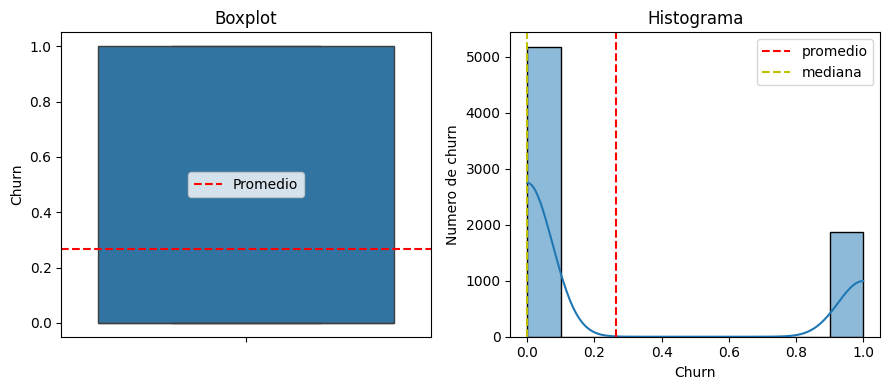

In [ ]:

Churn_promedio = Datos_transformados['Churn'].mean()
Churn_mediana = Datos_transformados['Churn'].median()

fig, ax = plt.subplots(1,2,figsize = (9,4))
sns.boxplot(data=Datos_transformados,y='Churn', ax = ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=Churn_promedio, color = 'r', linestyle= '--', label = 'Promedio')
ax[0].legend()


binwidth = ancho_bin(Datos_transformados,'Churn')
sns.histplot(data=Datos_transformados, x='Churn', ax = ax[1],kde=True, binwidth = binwidth)
plt.ylabel('Numero de churn')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=Churn_promedio, color = 'r', linestyle= '--', label = 'promedio')
ax[1].axvline(x=Churn_mediana, color = 'y', linestyle = '--', label = 'mediana')
ax[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
Datos_transformados['Churn'].value_counts()

,count
Churn,
0.0,5174
1.0,1869


In [ ]:
Datos_transformados['Churn'].value_counts(normalize=True)*100

,proportion
Churn,
0.0,73.463013
1.0,26.536987


**Se confirma un desbalance, ya que tenemos mucho menos churn que los clientes que han permanecido**

###2.1.1. Balanceo de Clases

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desvio_estandar = resultados['test_score'].std()
  return f'el intervalo de confianza es:[{promedio - 2*desvio_estandar}, {min(promedio + 2*desvio_estandar,1)}]'

In [ ]:
def informe_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_estandar = resultados[metrica].std()
        print(f'Intervalo de confianza({metrica}): [{media-2*desvio_estandar}, {min(media+2*desvio_estandar, 1.0)}]')


2.1.1.1. Oversampling

In [ ]:
oversampling = SMOTE()
X_balanceada, y_balanceada = oversampling.fit_resample(X_train, y_train)


In [ ]:
y_balanceada.value_counts(normalize = True)

,proportion
onehotencoder__Churn_Yes,
0.0,0.5
1.0,0.5


In [ ]:
y_balanceada.value_counts()

,count
onehotencoder__Churn_Yes,
0.0,4138
1.0,4138


In [ ]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X_balanceada, y_balanceada, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])

In [ ]:
cv_resultados

{'fit_time': array([0.01458669, 0.01401138, 0.01373172, 0.01454663, 0.01427817]),
 'score_time': array([0.01087379, 0.01039195, 0.01011276, 0.01029348, 0.01032448]),
 'test_accuracy': array([0.77958937, 0.76374622, 0.77462236, 0.7734139 , 0.78851964]),
 'test_recall': array([0.84541063, 0.84764208, 0.85006046, 0.8321256 , 0.87077295]),
 'test_precision': array([0.7470651 , 0.72567288, 0.73844538, 0.74486486, 0.74792531]),
 'test_f1': array([0.79320113, 0.78192973, 0.79033165, 0.786081  , 0.8046875 ])}

In [ ]:
informe_metricas(cv_resultados)

Intervalo de confianza(test_accuracy): [0.7597705603353777, 0.7921860343783429]
Intervalo de confianza(test_recall): [0.8243113193947024, 0.87409336782235]
Intervalo de confianza(test_precision): [0.7242800196491572, 0.7573093937322999]
Intervalo de confianza(test_f1): [0.7757852153764514, 0.8067071889616789]


###2.1.2. Undersampling

In [ ]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline(steps=[('undersample', NearMiss(version = 1)), ('arbol', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados_undersampling = cross_validate(pipeline, X, y, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])

In [ ]:
informe_metricas(cv_resultados_undersampling)

Intervalo de confianza(test_accuracy): [0.5179446640375942, 0.6258700578799488]
Intervalo de confianza(test_recall): [0.5506981609123842, 0.7205094203409312]
Intervalo de confianza(test_precision): [0.28698980158187776, 0.3881209330710513]
Intervalo de confianza(test_f1): [0.37781225460517587, 0.5039752408527608]


### Decision

despues de validar el test de precision, queda claro que lo mejor seria utilizar el oversampling, ya que como la cantidad de datos del Churn igual a 1 es mucho menor que el valor cero, se perderia mucha informacion alrededor de 3000 entradas lo cual afectaria la precision del modelo